In [67]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')
import pylab

---
## 2. Load data

In [68]:
#uploading the csv files of client 
cd=pd.read_csv('client_data.csv')
cd.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [69]:
#uploading the csv files of price 
pds=pd.read_csv('price_data.csv')
pds.tail()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [70]:
#Copy the columns

df=cd.copy()
df1=pds.copy()

In [71]:
#changing the data types to data and time
for i in ['date_activ','date_end','date_modif_prod','date_renewal']:
    df[i] = pd.to_datetime(df[i])

In [72]:
df['modif_year'] = df['date_modif_prod'].dt.year
df['renewal_year'] = df['date_renewal'].dt.year
df['start_year'] = df['date_modif_prod'].dt.year
df['end_year'] = df['date_renewal'].dt.year
df = df.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'])

In [73]:
#channel_sales and origin up are not unsderstanding so doing label encoder
#channel_encoder = preprocessing.LabelEncoder()
#df['channel_sales'] = channel_encoder.fit_transform(df['channel_sales'])
#origin_encoder = preprocessing.LabelEncoder()
#df['origin_up'] = origin_encoder.fit_transform(df['origin_up'])
#has_gas= preprocessing.LableEncoder()
#df['has_gas']= hg_encoder.fit_transform(df['has_gas'])

def preprocessor(df):
    le = preprocessing.LabelEncoder()
    
    df['channel_sales'] = le.fit_transform(df['channel_sales']) 
    df['origin_up'] = le.fit_transform(df['origin_up'])
    df['has_gas'] = le.fit_transform(df['has_gas'])

    return df

In [74]:
df = preprocessor(df)

In [75]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,modif_year,renewal_year,start_year,end_year
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2,678.99,3,4,43.648,1,2015,2015,2015,2015
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,189.95,0,0.0,16.27,0.145711,...,1,18.89,6,2,13.800,0,2009,2015,2009,2015
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0.0,38.72,0.165794,...,1,6.60,6,2,13.856,0,2010,2015,2010,2015
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,240.04,0,0.0,19.83,0.146694,...,1,25.46,6,2,13.200,0,2010,2015,2010,2015
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,445.75,526,0.0,131.73,0.116900,...,1,47.98,6,2,19.800,0,2010,2015,2010,2015


In [76]:
#change the data type
df1["price_date"] = pd.to_datetime(df1['price_date'])
df1.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [77]:
diff_dec_jan_off_peak_var = df1.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(-1) - df1.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_var'].nth(0)
diff_dec_jan_off_peak_var = diff_dec_jan_off_peak_var.reset_index(name='diff_dec_jan_off_peak_var')
diff_dec_jan_off_peak_fix = df1.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(-1) - df1.sort_values(by=['price_date']).groupby(['id'])['price_off_peak_fix'].nth(0)
diff_dec_jan_off_peak_fix = diff_dec_jan_off_peak_fix.reset_index(name='diff_dec_jan_off_peak_fix')
df = df.merge(diff_dec_jan_off_peak_var, on='id', how='left')
df = df.merge(diff_dec_jan_off_peak_fix, on='id', how='left')

In [78]:
for attr in ['price_peak_var','price_peak_fix','price_mid_peak_var','price_mid_peak_fix']:
    diff_dec_jan_temp = df1.sort_values(by=['price_date']).groupby(['id'])[attr].nth(-1) - df1.sort_values(by=['price_date']).groupby(['id'])[attr].nth(0)
    diff_dec_jan_temp = diff_dec_jan_temp.reset_index(name=f'diff_dec_jan_{attr}')
    df = df.merge(diff_dec_jan_temp, on='id', how='left')
    

df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,modif_year,renewal_year,start_year,end_year,diff_dec_jan_off_peak_var,diff_dec_jan_off_peak_fix,diff_dec_jan_price_peak_var,diff_dec_jan_price_peak_fix,diff_dec_jan_price_mid_peak_var,diff_dec_jan_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,0.00,0,0.0,1.78,0.114481,...,2015,2015,2015,2015,0.020057,3.700961,-0.017912,-24.339581,-0.071536,-16.226389
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,189.95,0,0.0,16.27,0.145711,...,2009,2015,2009,2015,-0.003767,0.177779,0.000000,0.000000,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0.0,38.72,0.165794,...,2010,2015,2010,2015,-0.004670,0.177779,0.000528,0.000000,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,240.04,0,0.0,19.83,0.146694,...,2010,2015,2010,2015,-0.004547,0.177779,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,445.75,526,0.0,131.73,0.116900,...,2010,2015,2010,2015,-0.006192,0.162916,-0.002302,0.097749,0.003487,0.065166


# Treating Outliers

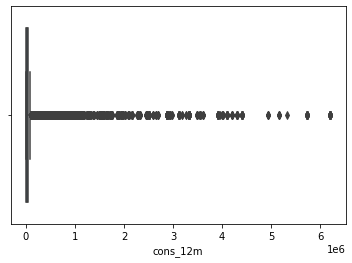

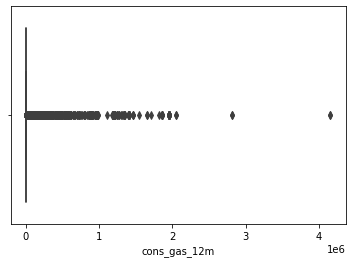

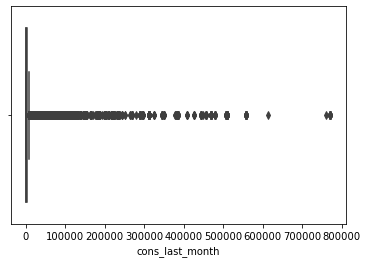

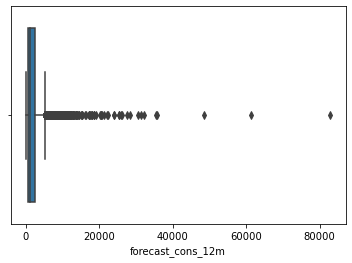

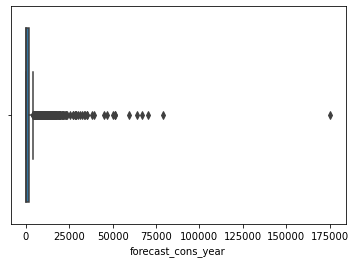

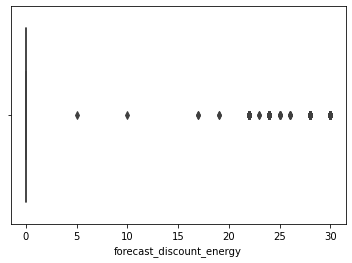

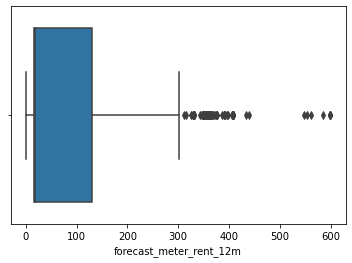

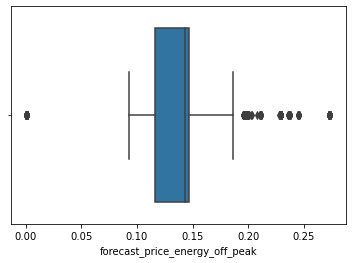

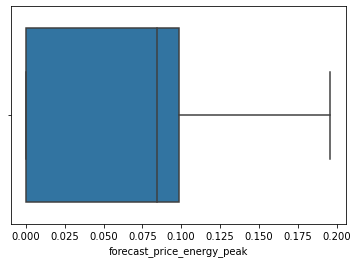

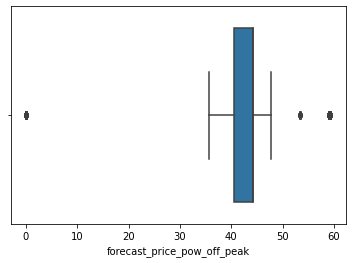

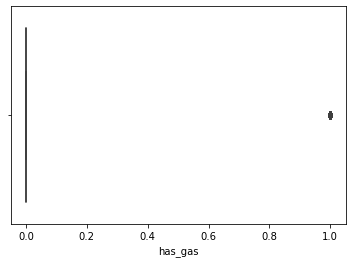

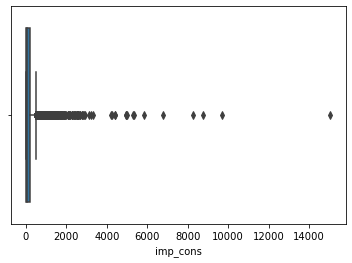

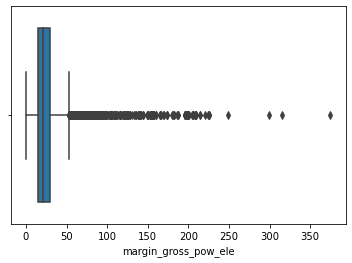

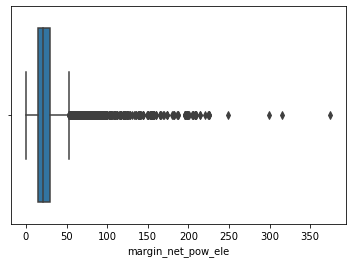

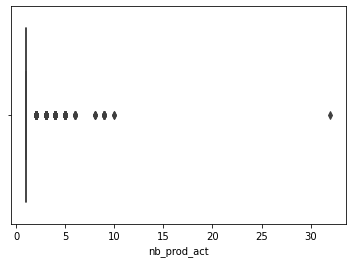

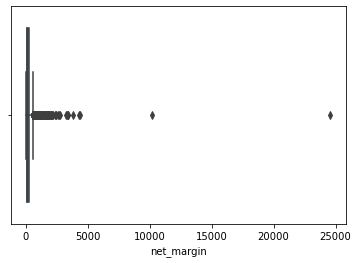

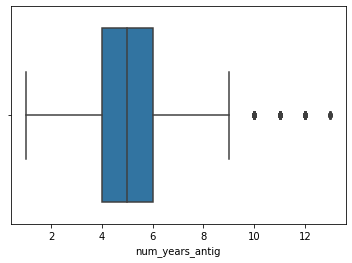

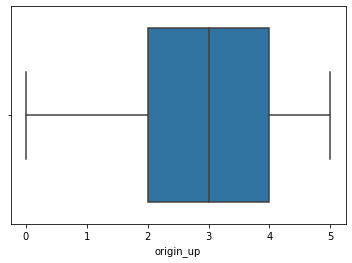

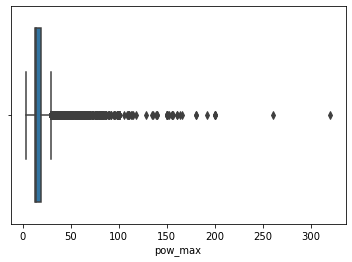

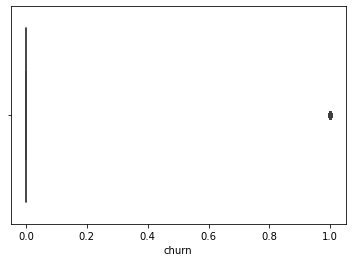

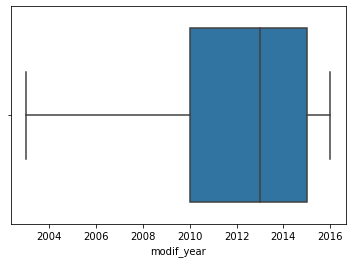

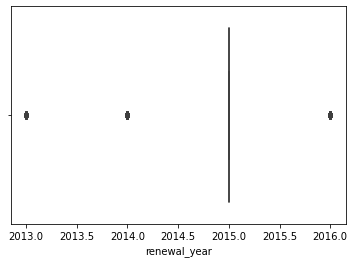

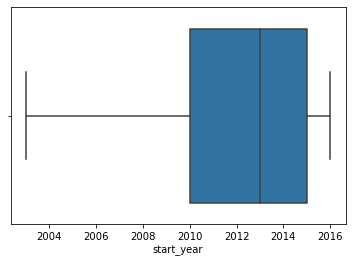

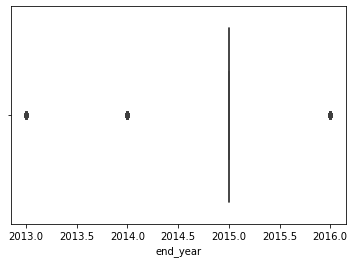

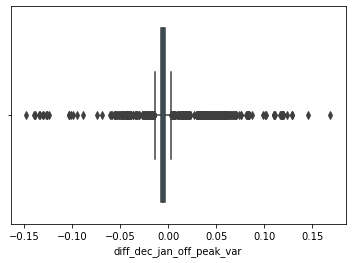

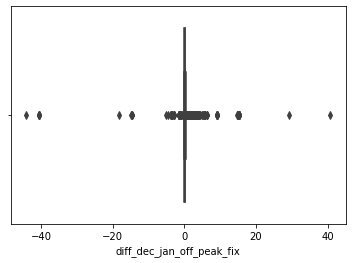

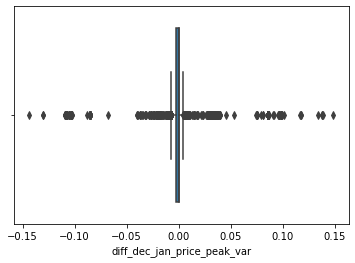

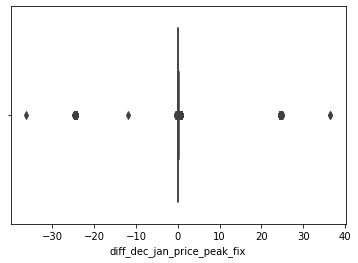

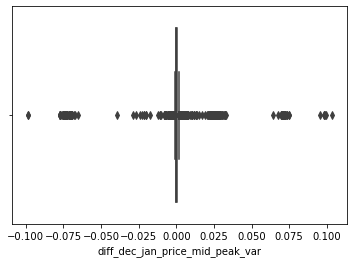

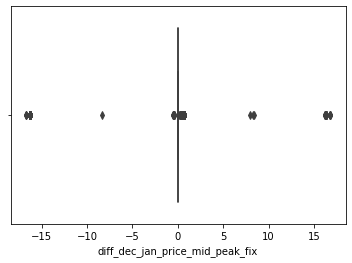

In [79]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object','datetime64']).columns)[1:]:
    boxplots(i)

In [80]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [81]:
lrcons_gas_12m, upcons_gas_12m = remove_outlier(df['cons_gas_12m'])
df['cons_gas_12m'] = np.where(df['cons_gas_12m']>upcons_gas_12m, upcons_gas_12m, df['cons_gas_12m'])
df['cons_gas_12m'] = np.where(df['cons_gas_12m']< lrcons_gas_12m, lrcons_gas_12m, df['cons_gas_12m'])

lrcons_last_month, upcons_last_month = remove_outlier(df['cons_last_month'])
df['cons_last_month'] = np.where(df['cons_last_month']>upcons_last_month, upcons_last_month, df['cons_last_month'])
df['cons_last_month'] = np.where(df['cons_last_month']< lrcons_last_month, lrcons_last_month, df['cons_last_month'])

lrforecast_cons_12m, upforecast_cons_12m = remove_outlier(df['forecast_cons_12m'])
df['forecast_cons_12m'] = np.where(df['forecast_cons_12m']>upforecast_cons_12m, upforecast_cons_12m, df['forecast_cons_12m'])
df['forecast_cons_12m'] = np.where(df['forecast_cons_12m']< lrforecast_cons_12m, lrforecast_cons_12m, df['forecast_cons_12m'])

lrforecast_cons_year, upforecast_cons_year = remove_outlier(df['forecast_cons_year'])
df['forecast_cons_year'] = np.where(df['forecast_cons_year']>upforecast_cons_year, upforecast_cons_year, df['forecast_cons_year'])
df['forecast_cons_year'] = np.where(df['forecast_cons_year']< lrforecast_cons_year, lrforecast_cons_year, df['forecast_cons_year'])

lrforecast_discount_energy, upforecast_discount_energy = remove_outlier(df['forecast_discount_energy'])
df['forecast_discount_energy'] = np.where(df['forecast_discount_energy']>upforecast_discount_energy, upforecast_discount_energy, df['forecast_discount_energy'])
df['forecast_discount_energy'] = np.where(df['forecast_discount_energy']< lrforecast_discount_energy, lrforecast_discount_energy, df['forecast_discount_energy'])

lrforecast_meter_rent_12m, upforecast_meter_rent_12m = remove_outlier(df['forecast_meter_rent_12m'])
df['forecast_meter_rent_12m'] = np.where(df['forecast_meter_rent_12m']>upforecast_meter_rent_12m, upforecast_meter_rent_12m, df['forecast_meter_rent_12m'])
df['forecast_meter_rent_12m'] = np.where(df['forecast_meter_rent_12m']< lrforecast_meter_rent_12m, lrforecast_meter_rent_12m, df['forecast_meter_rent_12m'])

lrforecast_price_energy_off_peak, upforecast_price_energy_off_peak = remove_outlier(df['forecast_price_energy_off_peak'])
df['forecast_price_energy_off_peak'] = np.where(df['forecast_price_energy_off_peak']>upforecast_price_energy_off_peak, upforecast_price_energy_off_peak, df['forecast_price_energy_off_peak'])
df['forecast_price_energy_off_peak'] = np.where(df['forecast_price_energy_off_peak']< lrforecast_price_energy_off_peak, lrforecast_price_energy_off_peak, df['forecast_price_energy_off_peak'])

lrforecast_price_pow_off_peak, upforecast_price_pow_off_peak = remove_outlier(df['forecast_price_pow_off_peak'])
df['forecast_price_pow_off_peak'] = np.where(df['forecast_price_pow_off_peak']>upforecast_price_pow_off_peak, upforecast_price_pow_off_peak, df['forecast_price_pow_off_peak'])
df['forecast_price_pow_off_peak'] = np.where(df['forecast_price_pow_off_peak']< lrforecast_price_pow_off_peak, lrforecast_price_pow_off_peak, df['forecast_price_pow_off_peak'])

lrimp_cons, upimp_cons = remove_outlier(df['imp_cons'])
df['imp_cons'] = np.where(df['imp_cons']>upimp_cons, upimp_cons, df['imp_cons'])
df['imp_cons'] = np.where(df['imp_cons']< lrimp_cons, lrimp_cons, df['imp_cons'])

lrmargin_gross_pow_ele, upmargin_gross_pow_ele = remove_outlier(df['margin_gross_pow_ele'])
df['margin_gross_pow_ele'] = np.where(df['margin_gross_pow_ele']>upmargin_gross_pow_ele, upmargin_gross_pow_ele, df['margin_gross_pow_ele'])
df['margin_gross_pow_ele'] = np.where(df['margin_gross_pow_ele']< lrmargin_gross_pow_ele, lrmargin_gross_pow_ele, df['margin_gross_pow_ele'])

lrmargin_net_pow_ele, upmargin_net_pow_ele= remove_outlier(df['margin_net_pow_ele'])
df['margin_net_pow_ele'] = np.where(df['margin_net_pow_ele']>upmargin_net_pow_ele, upmargin_net_pow_ele, df['margin_net_pow_ele'])
df['margin_net_pow_ele'] = np.where(df['margin_net_pow_ele']< lrmargin_net_pow_ele, lrmargin_net_pow_ele, df['margin_net_pow_ele'])

lrnb_prod_act, upnb_prod_act = remove_outlier(df['nb_prod_act'])
df['nb_prod_act'] = np.where(df['nb_prod_act']>upnb_prod_act, upnb_prod_act, df['nb_prod_act'])
df['nb_prod_act'] = np.where(df['nb_prod_act']< lrnb_prod_act, lrnb_prod_act, df['nb_prod_act'])

lrnet_margin, upnet_margin = remove_outlier(df['net_margin'])
df['net_margin'] = np.where(df['net_margin']>upnet_margin, upnet_margin, df['net_margin'])
df['net_margin'] = np.where(df['net_margin']< lrnet_margin, lrnet_margin, df['net_margin'])

lrpow_max, uppow_max = remove_outlier(df['pow_max'])
df['pow_max'] = np.where(df['pow_max']>uppow_max, uppow_max, df['pow_max'])
df['pow_max'] = np.where(df['pow_max']< lrpow_max, lrpow_max, df['pow_max'])

lrnum_years_antig, upnum_years_antig = remove_outlier(df['num_years_antig'])
df['num_years_antig'] = np.where(df['num_years_antig']>upnet_margin, upnet_margin, df['num_years_antig'])
df['num_years_antig'] = np.where(df['num_years_antig']< lrnet_margin, lrnet_margin, df['num_years_antig'])

# Treating Skewiness

In [82]:
df.skew().sort_values(ascending=False)

cons_12m                           5.997308
diff_dec_jan_off_peak_var          3.377645
churn                              2.720715
has_gas                            1.652855
num_years_antig                    1.446214
forecast_cons_year                 1.240244
imp_cons                           1.233204
diff_dec_jan_price_peak_var        1.229038
cons_last_month                    1.204561
pow_max                            1.143216
net_margin                         1.115920
forecast_cons_12m                  1.108772
forecast_meter_rent_12m            0.953549
renewal_year                       0.821770
end_year                           0.821770
margin_net_pow_ele                 0.554469
margin_gross_pow_ele               0.554187
forecast_price_energy_off_peak     0.090157
forecast_discount_energy           0.000000
cons_gas_12m                       0.000000
nb_prod_act                        0.000000
forecast_price_energy_peak        -0.014331
forecast_price_pow_off_peak     

In [83]:
sq_cons_12m=np.sqrt(df['cons_12m'])
sq_cons_12m.skew()
df['cons_12m']=sq_cons_12m

In [84]:
df["churn"].value_counts()


0    13187
1     1419
Name: churn, dtype: int64

# FEATURE SCALING

CLASSIFICATION: TREE BASED MODEL
--No need to peform feature scaling 

In [85]:
x = df.drop(columns=['id','churn'],axis=1)
y = df['churn']
x.shape, y.shape

((14606, 30), (14606,))

In [86]:
#!pip install imblearn

In [87]:
import imblearn

In [88]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_over, y_over = over.fit_resample(x,y)

In [89]:
print(y_over.value_counts())
print(x_over.shape, y_over.shape)
print(x.shape, y.shape)

1    13187
0    13187
Name: churn, dtype: int64
(26374, 30) (26374,)
(14606, 30) (14606,)


# Splitting the data

In [90]:
# split the data into training and test
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.20, random_state=1)

# Random Forest Model

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [92]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [93]:
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test,y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2685
           1       0.99      1.00      0.99      2590

    accuracy                           0.99      5275
   macro avg       0.99      0.99      0.99      5275
weighted avg       0.99      0.99      0.99      5275



In [94]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf_test)

Text(0.5, 257.44, 'Predicted label')

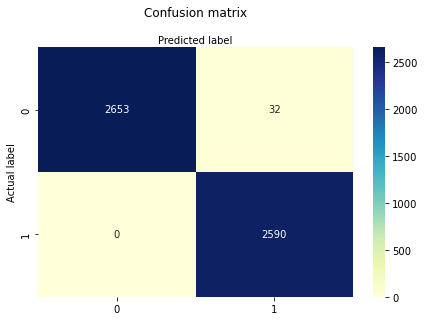

In [95]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [96]:
#performance Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf_test))
print("Precision:",metrics.precision_score(y_test, y_pred_rf_test))
print("Recall:",metrics.recall_score(y_test, y_pred_rf_test))

Accuracy: 0.9939336492890996
Precision: 0.9877955758962624
Recall: 1.0


MODELLING DETAILS


1. loaded the dataset
2. Treating the outliers and removing them
3. Treating the skewness
4. There is imbalance in the dataset so treating the dataset with over sampling technique 
5. splitting the train and test dataset in 80% and 20% 
6. Used random forest classifier model 
7. Performation matrix : Confusion matrix,accuracy, precision and recall was evaluated


In [99]:
feature_importances = pd.DataFrame({
    'features': x_train.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

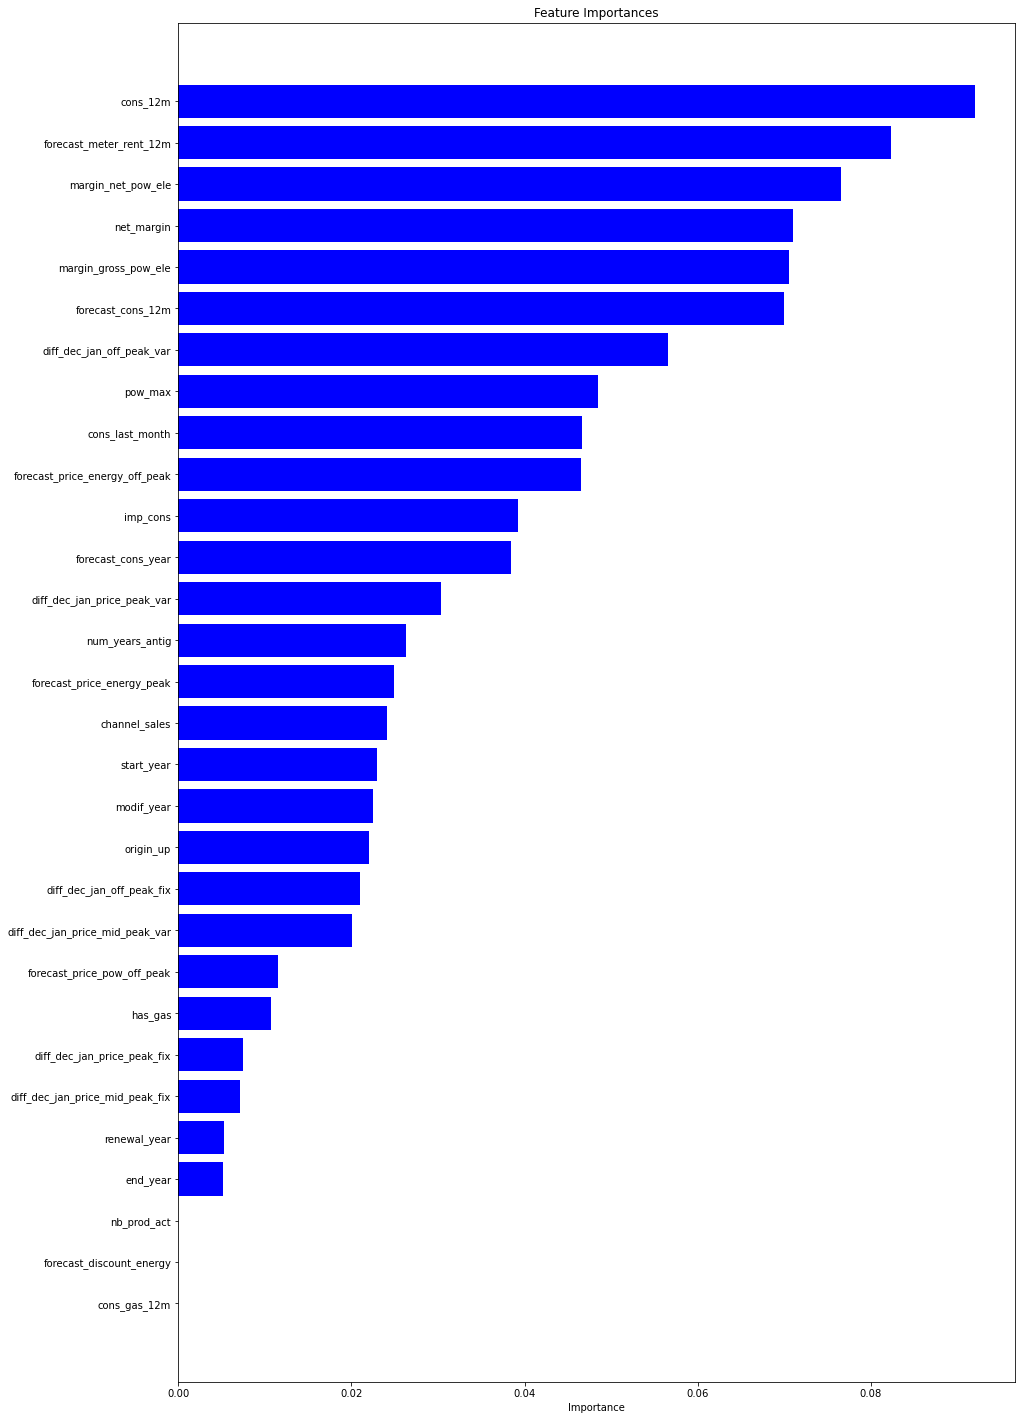

In [100]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()